<a href="https://colab.research.google.com/github/deenah128/CODSOFT/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.shape

(200, 4)

In [ ]:
df.dtypes

,0
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


In [ ]:
df.isna().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

<Axes: xlabel='TV', ylabel='Sales'>

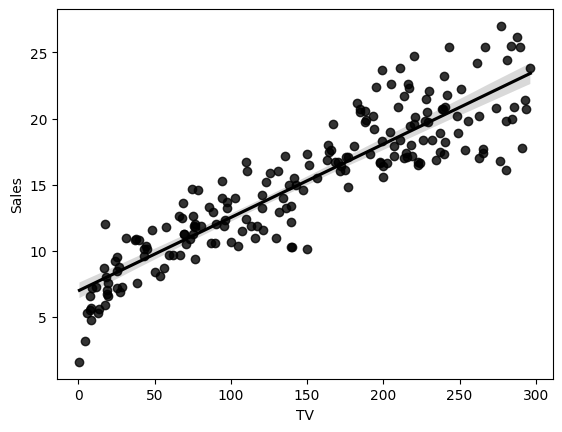

In [ ]:
sns.regplot(x=df['TV'],y=y,color='k')

<Axes: xlabel='Radio', ylabel='Sales'>

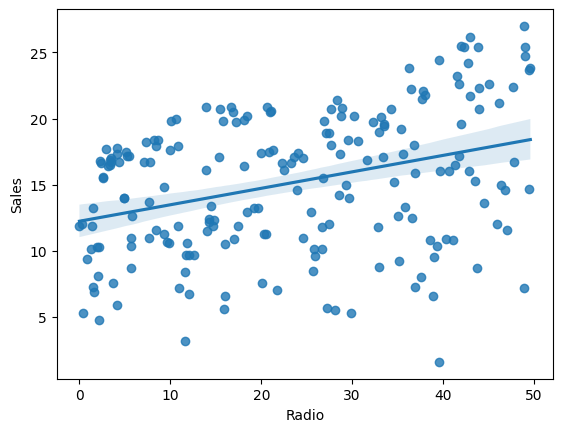

In [ ]:
sns.regplot(x=df['Radio'],y=y)

<Axes: xlabel='Newspaper', ylabel='Sales'>

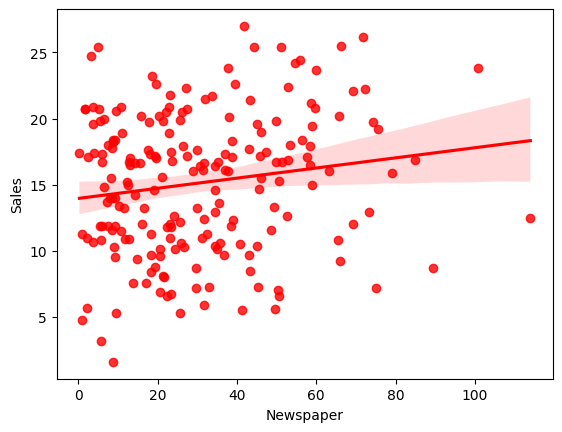

In [ ]:
sns.regplot(x=df['Newspaper'],y=y,color='r')

<Axes: ylabel='TV'>

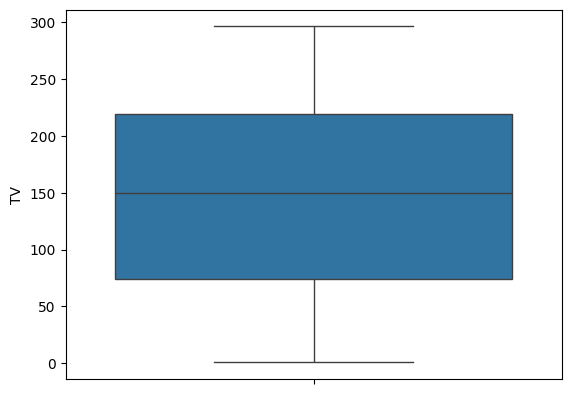

In [ ]:
sns.boxplot(data=df['TV'])


<Axes: ylabel='Radio'>

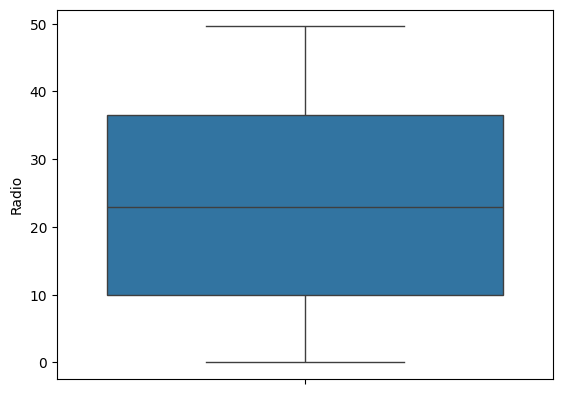

In [ ]:
sns.boxplot(data=df['Radio'])

<Axes: ylabel='Newspaper'>

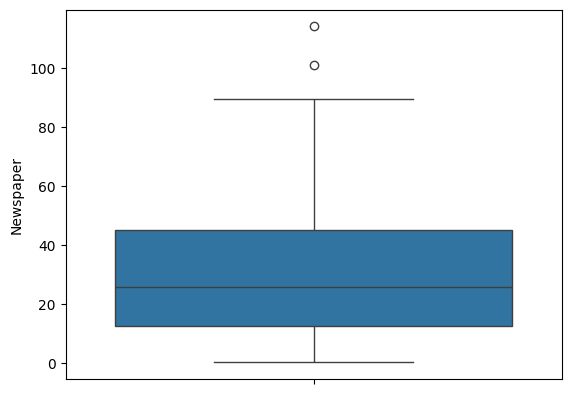

In [ ]:
sns.boxplot(data=df['Newspaper'])

In [ ]:
for i in df.index:
  if df.loc[i,'Newspaper']>85:
    df.loc[i,'Newspaper']=df['Newspaper'].mean()

<Axes: ylabel='Newspaper'>

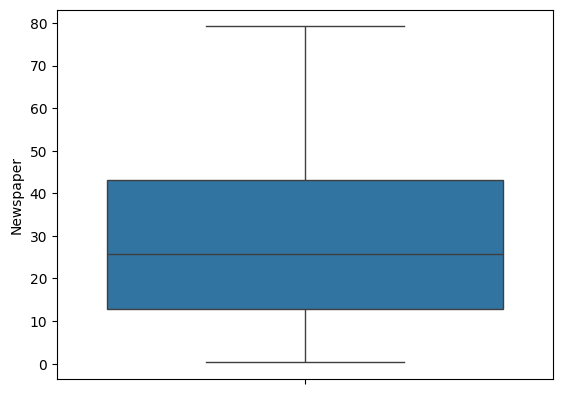

In [ ]:
sns.boxplot(data=df['Newspaper'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,TV,Radio,Newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([17.20358228, 20.56955912, 23.72820445,  9.53040101, 21.54855668,
       12.81388597, 21.07704485,  8.74041342, 17.10599619, 16.69734816,
        8.91399967,  8.58268575, 17.9171798 ,  8.12476307, 12.65638243,
       14.97084709,  8.35877779, 17.81612883, 11.12537617, 20.34962094,
       21.03881539, 12.36679967, 10.96062404, 22.5974041 ,  9.35301848,
        7.97832259, 20.87317438, 13.74913273, 10.83174007,  7.93828483,
       15.89108644, 10.67824286, 21.00095154, 10.35479999, 21.54277775,
       21.03019532, 12.16365324, 22.92153239, 12.53583927,  6.53489839,
       11.93176873, 15.20481358, 10.07554806,  9.50174033, 17.11451039,
        7.25549406, 10.51619251, 15.22554342, 11.22720771, 11.75095664,
       14.0048025 , 14.58181125, 10.8878074 ,  9.57839536,  9.02005753,
       12.52791121, 10.49329497, 25.06388766,  7.96203052, 15.7138837 ])

In [ ]:
df1=pd.DataFrame({'Actual_Value':y_test,'Predicted_value':y_pred,'Difference':y_test-y_pred})
df1

,Actual_Value,Predicted_value,Difference
95,16.9,17.203582,-0.303582
15,22.4,20.569559,1.830441
30,21.4,23.728204,-2.328204
158,7.3,9.530401,-2.230401
128,24.7,21.548557,3.151443
115,12.6,12.813886,-0.213886
69,22.3,21.077045,1.222955
170,8.4,8.740413,-0.340413
174,16.5,17.105996,-0.605996
45,16.1,16.697348,-0.597348


In [ ]:
print(list(zip(x,model.coef_)))

[('TV', 0.053680887169392504), ('Radio', 0.10203853220541834), ('Newspaper', 0.009865324478049376)]


In [ ]:
print(model.intercept_)

4.691200120561728


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
print("Mean Absolute Error")
print(mean_absolute_error(y_test,y_pred))
print("\nMean Absolute Percentage Error")
print(mean_absolute_percentage_error(y_test,y_pred))
print("\nMean Squared Error")
mse=mean_squared_error(y_test,y_pred)
print(mse)
print("\nRoot Mean Squared Error")
print(np.sqrt(mse))
print("R2 Score")
print(r2_score(y_test,y_pred))

Mean Absolute Error
1.142329946237393

Mean Absolute Percentage Error
0.1036987446648167

Mean Squared Error
2.514194584308138

Root Mean Squared Error
1.5856211982400268
R2 Score
0.9101289130524086
